# Chapter 1: Exploratory Data Analysis

This notebook implements the concepts from Chapter 1 of *Practical Statistics for Data Scientists: 50+ Essential Concepts Using R and Python* by Maurits Kaptein and Edwin van den Heuvel.

## Overview

Exploratory Data Analysis (EDA) is the process of analyzing datasets to summarize their main characteristics, often using visual methods. This chapter covers:

- Elements of structured data
- Rectangular data
- Estimates of location
- Estimates of variability
- Exploring data distribution
- Categorical data
- Correlation
- Multivariate analysis

## 1. Elements of Structured Data

Structured data can be categorized into:
- **Numeric**: Continuous or discrete numbers
- **Categorical**: Fixed set of values (ordinal or nominal)

### Rectangular Data

Data is typically organized in a rectangular format with:
- **Features** (columns): Variables measured or recorded
- **Records** (rows): Individual observations or cases

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

# Enable inline plotting for Jupyter
%matplotlib inline

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Estimates of Location

Measures of central tendency:
- **Mean**: Average value
- **Median**: Middle value when sorted
- **Trimmed Mean**: Mean after removing extreme values
- **Weighted Mean**: Mean weighted by importance
- **Robust Statistics**: Less sensitive to outliers

In [7]:
# Load sample data

# Note: Boston dataset is deprecated, using California Housing instead
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MEDV'] = housing.target

print("Dataset shape:", df.shape)
print("First 5 rows:")
df.head()

Dataset shape: (20640, 9)
First 5 rows:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# Estimates of Location
median_income = df['MedInc']

print("Mean:", median_income.mean())
print("Median:", median_income.median())
print("Trimmed Mean (10%):", stats.trim_mean(median_income, 0.1)) 
# What is a trimmed mean?
# A trimmed mean is a measure of central tendency that removes a specified percentage of the smallest and largest values before calculating the mean. This helps to reduce the effect of outliers on the mean.

# Weighted mean example (using population as weights)
weights = df['Population']
print("Weighted Mean (by population):", np.average(median_income, weights=weights))

Mean: 3.8706710029069766
Median: 3.5347999999999997
Trimmed Mean (10%): 3.654012203246124
Weighted Mean (by population): 3.8779671410999446


## 3. Estimates of Variability

Measures of dispersion:
- **Variance**: Average of squared deviations from mean
- **Standard Deviation**: Square root of variance
- **Mean Absolute Deviation (MAD)**: Average absolute deviation from mean
- **Median Absolute Deviation**: MAD from median (more robust)
- **Range**: Max - Min
- **Interquartile Range (IQR)**: 75th percentile - 25th percentile

In [11]:
# Estimates of Variability
print("Variance:", median_income.var())
print("Standard Deviation:", median_income.std())
print("Mean Absolute Deviation:", np.mean(np.abs(median_income - median_income.mean())))
print("Median Absolute Deviation:", stats.median_abs_deviation(median_income))
print("Range:", median_income.max() - median_income.min())
print("IQR:", median_income.quantile(0.75) - median_income.quantile(0.25))

Variance: 3.6093225599765124
Standard Deviation: 1.8998217179452688
Mean Absolute Deviation: 1.4016136452417973
Median Absolute Deviation: 1.0641999999999996
Range: 14.5002
IQR: 2.17985


## 4. Exploring Data Distribution

Understanding the shape of data:
- **Percentiles**: Values below which a percentage of data falls
- **Boxplots**: Visual representation of distribution
- **Frequency Tables**: Counts of values
- **Histograms**: Distribution visualization
- **Density Plots**: Smoothed histograms

In [12]:
# Percentiles
print("Percentiles:")
print("25th:", median_income.quantile(0.25))
print("50th (Median):", median_income.quantile(0.5))
print("75th:", median_income.quantile(0.75))
print("95th:", median_income.quantile(0.95))

Percentiles:
25th: 2.5633999999999997
50th (Median): 3.5347999999999997
75th: 4.74325
95th: 7.300305


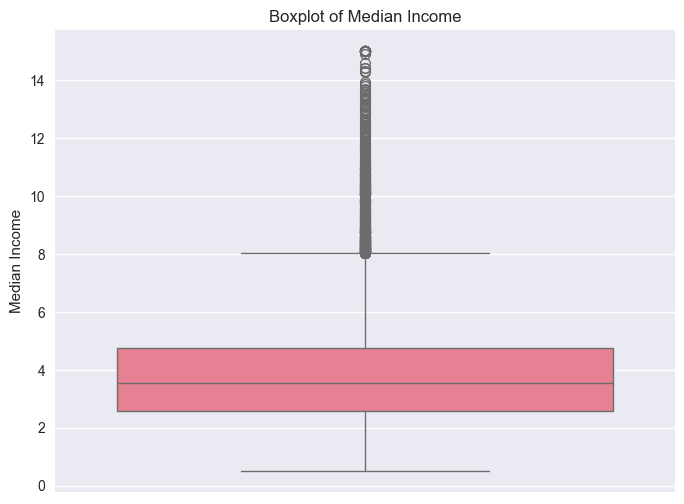

In [13]:
# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y=median_income)
plt.title('Boxplot of Median Income')
plt.ylabel('Median Income')
plt.show()

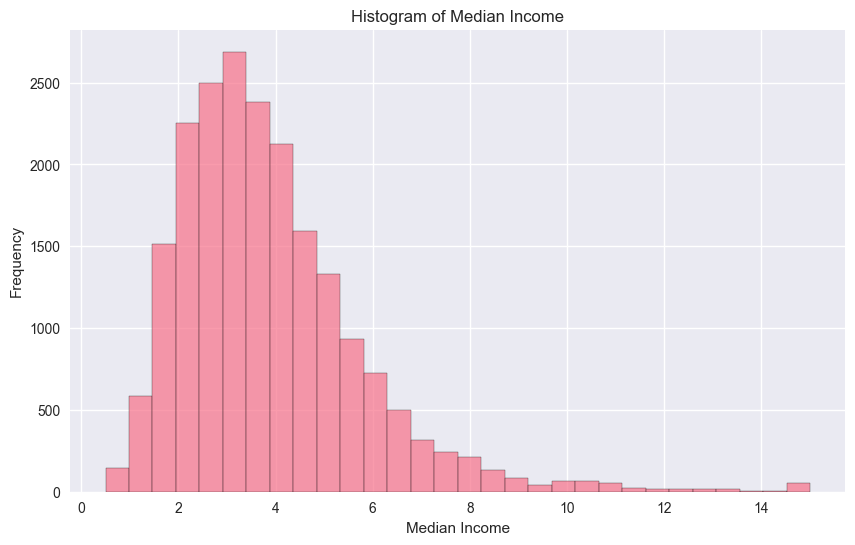

In [14]:
# Histogram
plt.figure(figsize=(10, 6))
plt.hist(median_income, bins=30, alpha=0.7, edgecolor='black')
plt.title('Histogram of Median Income')
plt.xlabel('Median Income')
plt.ylabel('Frequency')
plt.show()

C:\Users\Aryan Aarav\AppData\Local\Temp\ipykernel_4404\3544341956.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(median_income, shade=True)


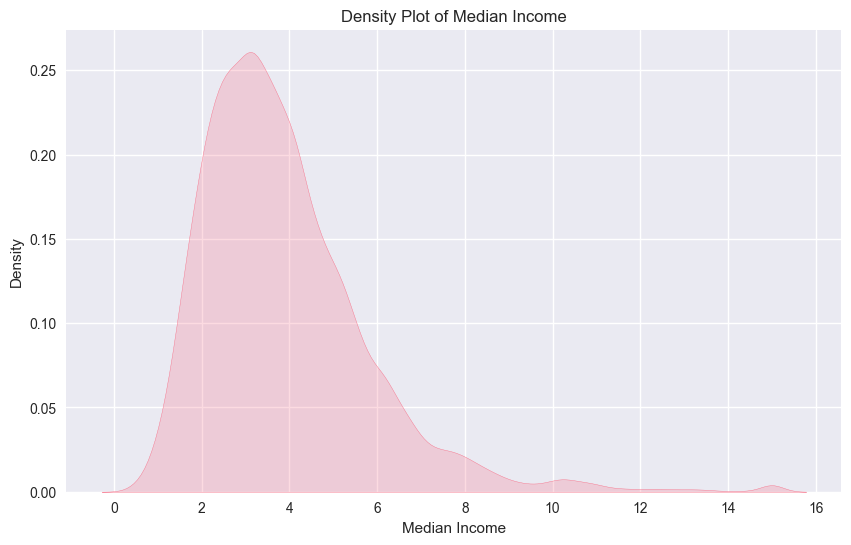

In [15]:
# Density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(median_income, shade=True)
plt.title('Density Plot of Median Income')
plt.xlabel('Median Income')
plt.show()

## 5. Categorical Data

Working with categorical variables:
- **Frequency Tables**: Count occurrences
- **Bar Charts**: Visual representation
- **Mode**: Most frequent value
- **Expected Value**: For probability distributions

In [16]:
# Create categorical data from continuous
df['income_category'] = pd.cut(df['MedInc'], 
                               bins=[0, 2, 4, 6, 8, 10, 15],
                               labels=['Very Low', 'Low', 'Medium', 'High', 'Very High', 'Extremely High'])

# Frequency table
freq_table = df['income_category'].value_counts()
print("Frequency Table:")
print(freq_table)

# Mode
print("\nMode:", df['income_category'].mode()[0])

Frequency Table:
income_category
Low               10096
Medium             5725
Very Low           2457
High               1672
Very High           382
Extremely High      259
Name: count, dtype: int64

Mode: Low


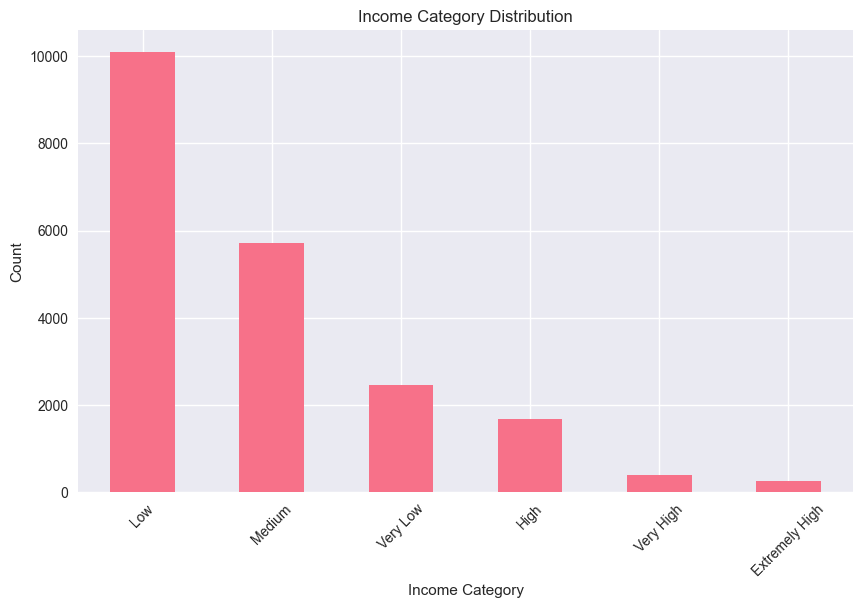

In [17]:
# Bar chart
plt.figure(figsize=(10, 6))
freq_table.plot(kind='bar')
plt.title('Income Category Distribution')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## 6. Correlation

Measuring relationships between variables:
- **Correlation Coefficient**: Measures linear relationship (-1 to 1)
- **Correlation Matrix**: Shows correlations between multiple variables
- **Scatterplots**: Visual representation of relationships
- **Heatmaps**: Visual correlation matrix

In [18]:
# Correlation between numeric variables
numeric_cols = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MEDV']
correlation_matrix = df[numeric_cols].corr()

print("Correlation with MEDV (target):")
print(correlation_matrix['MEDV'].sort_values(ascending=False))

Correlation with MEDV (target):
MEDV          1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: MEDV, dtype: float64


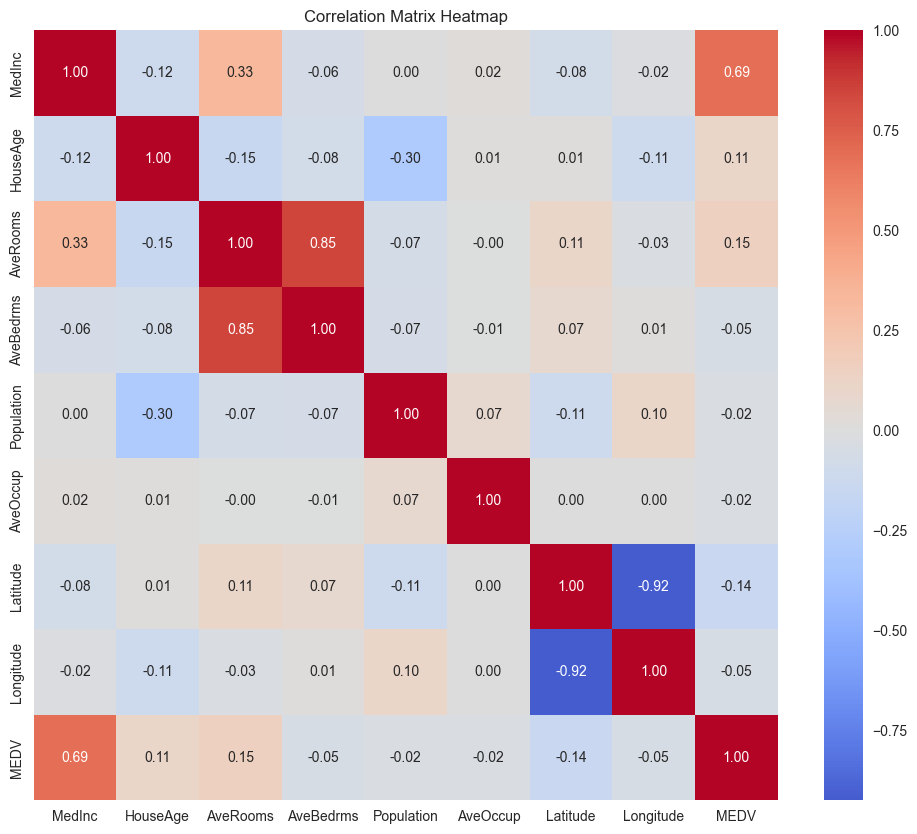

In [19]:
# Heatmap of correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

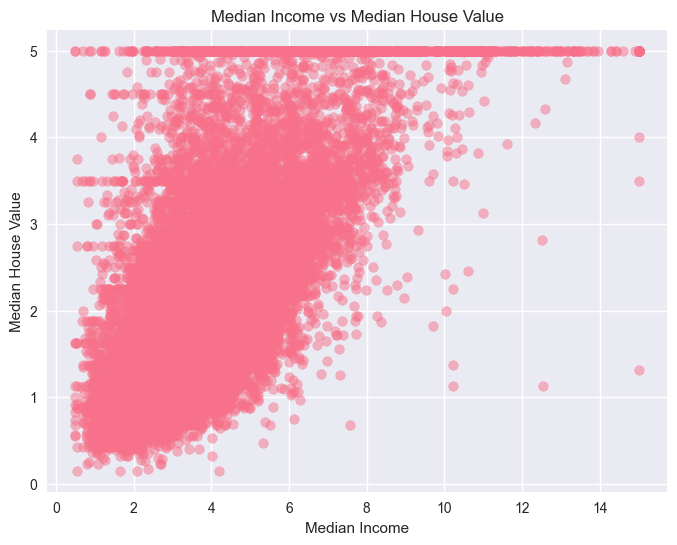

In [20]:
# Scatterplot example
plt.figure(figsize=(8, 6))
plt.scatter(df['MedInc'], df['MEDV'], alpha=0.5)
plt.title('Median Income vs Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

## 7. Multivariate Analysis

Exploring relationships between multiple variables:
- **Contingency Tables**: For categorical variables
- **Hexagonal Binning**: For large datasets
- **Contour Plots**: Density estimation
- **Violin Plots**: Distribution comparison

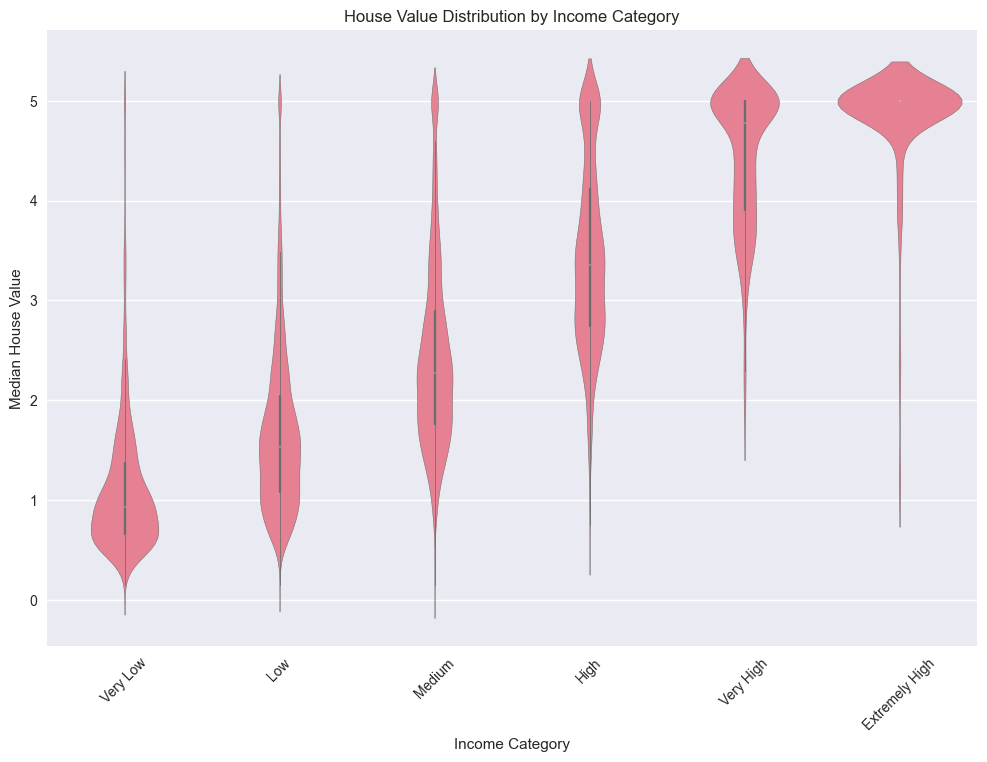

In [21]:
# Violin plot comparing distributions
plt.figure(figsize=(12, 8))
sns.violinplot(x='income_category', y='MEDV', data=df)
plt.title('House Value Distribution by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Median House Value')
plt.xticks(rotation=45)
plt.show()

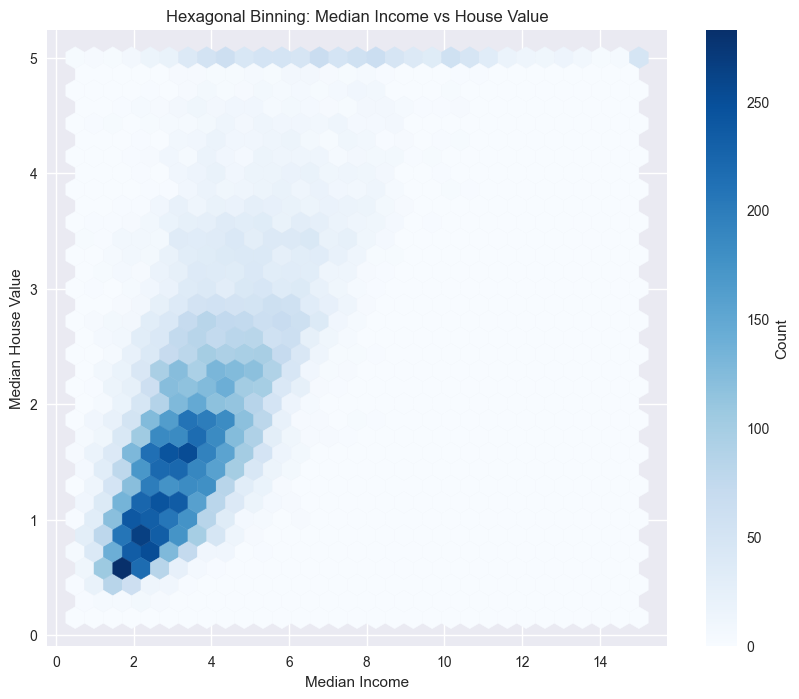

In [22]:
# Hexagonal binning for large scatterplot
plt.figure(figsize=(10, 8))
plt.hexbin(df['MedInc'], df['MEDV'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count')
plt.title('Hexagonal Binning: Median Income vs House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

## Key Takeaways

1. **EDA is iterative**: Start with broad questions, then drill down
2. **Location measures** help understand central tendency
3. **Variability measures** show spread and consistency
4. **Data distribution** reveals shape, outliers, and patterns
5. **Correlation** identifies relationships between variables
6. **Visualization** is crucial for understanding data

## Exercises

1. Calculate different location estimates for another variable in the dataset
2. Create a frequency table for a categorical variable you create
3. Find the most correlated variables with the target
4. Experiment with different bin sizes in histograms
5. Create a scatterplot matrix for multiple variables

# Following the concepts in the chapter of the book.

In [2]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

In [3]:
STATE_CSV = 'D:\data-science-foundations\Statistics\Chapter1_Exploratory_Data_Analysis\Datasets\statedata.csv'

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Aryan Aarav\AppData\Local\Temp\ipykernel_11932\2063492579.py:1: SyntaxWarning: invalid escape sequence '\d'
  STATE_CSV = 'D:\data-science-foundations\Statistics\Chapter1_Exploratory_Data_Analysis\Datasets\statedata.csv'


# Estimates of Location

### Example: Location Estimates of Population and Murder Rates

In [6]:
state = pd.read_csv(STATE_CSV)
state['Population'] = state['Population']*1000
print(state.head(8))

   Population  Income  Illiteracy  Life.Exp  Murder  HS.Grad  Frost    Area  \
0     3615000    3624         2.1     69.05    15.1     41.3     20   50708   
1      365000    6315         1.5     69.31    11.3     66.7    152  566432   
2     2212000    4530         1.8     70.55     7.8     58.1     15  113417   
3     2110000    3378         1.9     70.66    10.1     39.9     65   51945   
4    21198000    5114         1.1     71.71    10.3     62.6     20  156361   
5     2541000    4884         0.7     72.06     6.8     63.9    166  103766   
6     3100000    5348         1.1     72.48     3.1     56.0    139    4862   
7      579000    4809         0.9     70.06     6.2     54.6    103    1982   

  state.abb  state.area         x        y      state.division   state.name  \
0        AL       51609  -86.7509  32.5901  East South Central      Alabama   
1        AK      589757 -127.2500  49.2500             Pacific       Alaska   
2        AZ      113909 -111.6250  34.2192         

In [7]:
print(state['Population'].mean())

4246420.0
